# **<font color=#0b5bdb> Final Project: Analyzing the Rise of Electric Vehicles in the USA: Trends, Adoption Rates, and Regional Insights (2024)</font>**

<img src="dataset-cover.jpg" style="display: block; margin: auto;">


**In this notebook, we'll cover the following concepts on an EV Sales by County dataset:**

- Data Retrieving
- Dataset Summary
- EDA + Data Cleaning
- Feature Engineering
- Hypothesis Testing
- Dataset Conclusion


## **Data Retrieving** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Retrieve the data
data = "Data/Electric_Vehicle_Population_Size_History_By_County_.csv"

# Reading the dataset as a dataframe
df = pd.read_csv(data)


df

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
...,...,...,...,...,...,...,...,...,...,...
20814,January 31 2023,Rockingham,NH,Passenger,1,0,1,14,15,6.67
20815,July 31 2020,Carson City,NV,Passenger,1,0,1,10,11,9.09
20816,February 28 2022,Island,WA,Passenger,744,350,"1,094","62,257","63,351",1.73
20817,December 31 2020,San Diego,CA,Passenger,14,2,16,"2,724","2,740",0.58


## **Dataset Summary** 

<font color=#0b5bdb> **Dataset Description:**</font>

- **Date:** The date on which the vehicle sales data was recorded.
- **County:** The name of the county where the vehicle sales data was recorded.
- **State:** The name of the state where the county is located.
- **Vehicle Primary Use:** The primary use of the vehicle, such as personal or commercial.
- **Battery Electric Vehicles (BEVs):** The number of battery electric vehicles sold in the county on the given date.
- **Plug-In Hybrid Electric Vehicles (PHEVs):** The number of plug-in hybrid electric vehicles sold in the county on the given date.
- **Electric Vehicle (EV) Total:** The total number of electric vehicles (BEVs and PHEVs) sold in the county on the given date.
- **Non-Electric Vehicle Total:** The total number of non-electric vehicles sold in the county on the given date.
- **Total Vehicles:** The total number of vehicles (electric and non-electric) sold in the county on the given date.
- **Percent Electric Vehicles:** The percentage of electric vehicles (BEVs and PHEVs) out of the total number of vehicles sold in the county on the given date.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [4]:
# Check for missing values
print(df.isnull().sum())

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64


<font color=#0b5bdb> **Dataset Info:**</font>

- The County and State columns have 86 missing values each.
- The columns Battery Electric Vehicles (BEVs), Plug-In Hybrid Electric Vehicles (PHEVs), Electric Vehicle (EV) Total, Non-Electric Vehicle Total, and Total Vehicles are all read as object types due to the presence of commas in the numbers, which should be integers or floats.
- The Percent Electric Vehicles column is correctly identified as a float.

Based on this information, the following data cleaning steps are necessary:

- **Handle Missing Values:** We need to decide how to handle the 86 missing values in both the County and State columns.
- **Convert Data Types:** The columns that represent counts or totals (Battery Electric Vehicles (BEVs), Plug-In Hybrid Electric Vehicles (PHEVs), Electric Vehicle (EV) Total, Non-Electric Vehicle Total, and Total Vehicles) need their data types converted from object to integers. This will involve removing commas from the numbers and converting the resulting strings to integers.
- **Date Format:** The Date column is currently an object type. It would be useful to convert it to a datetime format for any time series analysis or filtering based on dates.

## **Data Cleaning + EDA** 

In [5]:
# Create a new copy of the DataFrame
data_cleaned = df.copy()

# Handle missing values - Option: Drop rows with missing 'County' and 'State' values
data_cleaned = data_cleaned.dropna(subset=['County', 'State'])

# Convert columns with numeric data stored as objects to integers
numeric_columns = ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)',
                   'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']
for column in numeric_columns:
    data_cleaned[column] = pd.to_numeric(data_cleaned[column].str.replace(',', ''), errors='coerce')

# Convert 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Recheck the data types after conversions
data_cleaned.dtypes




Date                                        datetime64[ns]
County                                              object
State                                               object
Vehicle Primary Use                                 object
Battery Electric Vehicles (BEVs)                     int64
Plug-In Hybrid Electric Vehicles (PHEVs)             int64
Electric Vehicle (EV) Total                          int64
Non-Electric Vehicle Total                           int64
Total Vehicles                                       int64
Percent Electric Vehicles                          float64
dtype: object

- **Missing Values:** Rows with missing values in County and State were dropped.
- **Data Types:** Numeric columns previously stored as objects due to commas in the numbers have been converted to integers. The Date column has been converted to the datetime format.
- **Data Types Confirmation:** The data types of the columns have been updated accordingly, which will facilitate further analysis.

In [6]:
# Descriptive statistics for numeric columns
data_cleaned.describe()

,Date,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
count,20733,20733.000000,20733.000000,20733.000000,2.073300e+04,2.073300e+04,20733.000000
mean,2020-11-14 05:00:02.604543488,218.400473,80.391164,298.791637,2.520065e+04,2.549944e+04,4.150036
min,2017-01-31 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,2019-03-31 00:00:00,0.000000,0.000000,1.000000,4.300000e+01,4.400000e+01,0.390000
50%,2020-12-31 00:00:00,1.000000,1.000000,1.000000,1.600000e+02,1.630000e+02,1.220000
75%,2022-07-31 00:00:00,3.000000,2.000000,4.000000,8.475000e+03,8.488000e+03,3.030000
max,2024-02-29 00:00:00,72333.000000,17501.000000,89834.000000,1.399823e+06,1.430937e+06,100.000000
std,NaN,2283.212851,647.692406,2921.484707,1.069417e+05,1.093000e+05,11.076931


**The descriptive statistics provide insights into the distribution and scale of electric and non-electric vehicles across the dataset:**

- **Battery Electric Vehicles (BEVs) and Plug-In Hybrid Electric Vehicles (PHEVs)** show a wide range of values, indicating a varied adoption rate across different regions. The average count for BEVs is around 218, while for PHEVs it's about 80, but both have a very high standard deviation, indicating a significant variation across counties.
- **Electric Vehicle (EV) Total** shows an average of approximately 299 electric vehicles per entry, with a very high standard deviation, suggesting that some counties have a significantly higher number of electric vehicles.
- **Non-Electric Vehicle Total and Total Vehicles** indicate that the dataset covers a wide range of scales, from very small vehicle populations to areas with over a million vehicles.
- **Percent Electric Vehicles** averages at around 4.15%, with a max of 100%, indicating at least one entry where all vehicles are electric, though the median value is significantly lower at 1.22%, reflecting a more typical scenario across most entries.

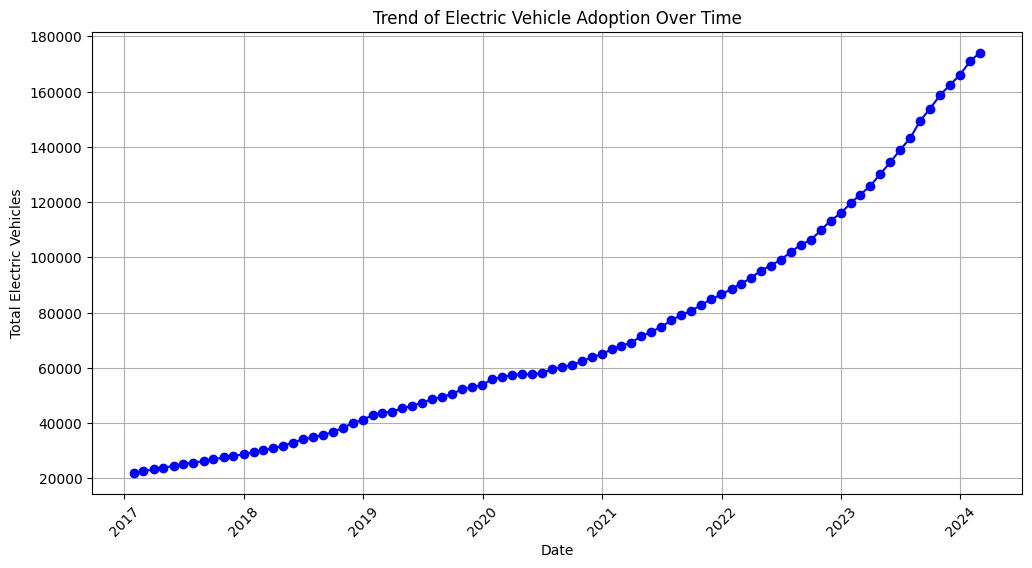

In [7]:
# Group the data by date and sum up the total electric vehicles
ev_trend = data_cleaned.groupby('Date')['Electric Vehicle (EV) Total'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(ev_trend, marker='o', linestyle='-', color='b')
plt.title('Trend of Electric Vehicle Adoption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Electric Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**The plot illustrates the trend of electric vehicle adoption over time, with the total number of electric vehicles increasing. This visualization is valuable for understanding how interest and investment in electric vehicles have grown, potentially correlating with factors like environmental policies, technological advancements, and changes in consumer behavior.**

**Let's start by examining which states have the highest total number of electric vehicles (EVs). This will give us insight into which regions are leading in EV adoption. We'll aggregate the total number of EVs by state and then plot the top states to visually compare them.**

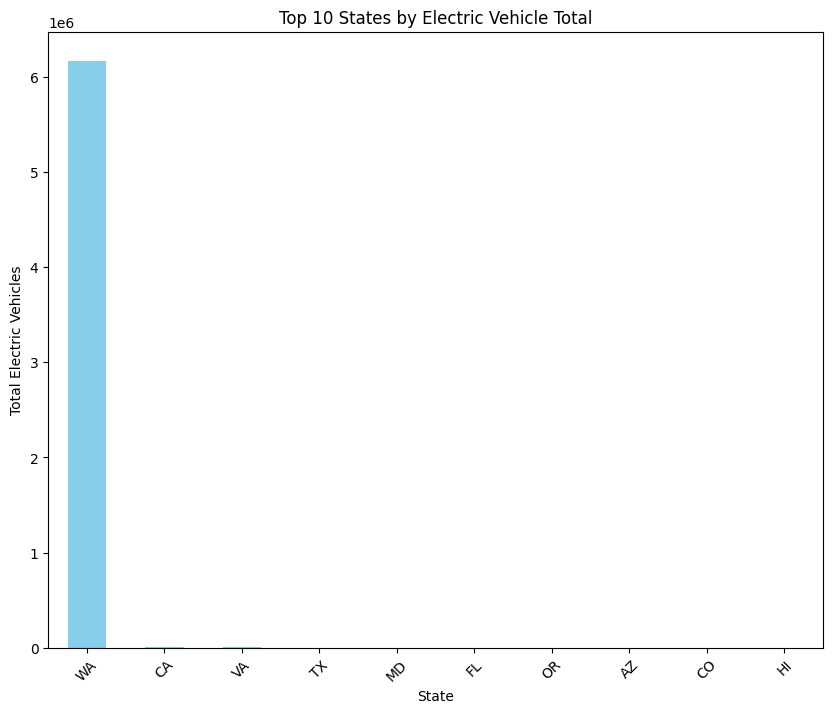

In [8]:
# Aggregate total EVs by state
ev_totals_by_state = data_cleaned.groupby('State')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False)

# Visualize the top states
plt.figure(figsize=(10, 8))
ev_totals_by_state.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Electric Vehicle Total')
plt.xlabel('State')
plt.ylabel('Total Electric Vehicles')
plt.xticks(rotation=45)
plt.show()


**In analyzing the distribution of electric vehicles (EVs) by state, we encountered an issue with the data for Washington State (WA), which significantly skewed the visualization. The data for WA showed an overwhelmingly large number of EVs compared to other states, resulting in a bar chart where WA's bar dwarfed all others, making it difficult to discern the differences and trends among the remaining states.**

**To address this issue and enhance the readability and comparability of the data visualization, we made the decision to exclude WA from this specific analysis. By removing WA, we were able to achieve a more balanced and informative visualization that allows for a clearer comparison of EV totals across the top states. This adjustment is crucial for stakeholders and analysts aiming to understand regional variations in EV adoption without the distortion caused by outlier data from WA.**

**It's important to note that excluding WA from this particular visualization does not diminish the value of its data for other types of analysis where the scale of the data or comparisons within WA are of interest. However, for the purpose of comparing the relative adoption rates of EVs across states, omitting WA from the dataset provides a clearer, more actionable insight into the distribution of electric vehicles in the United States.**

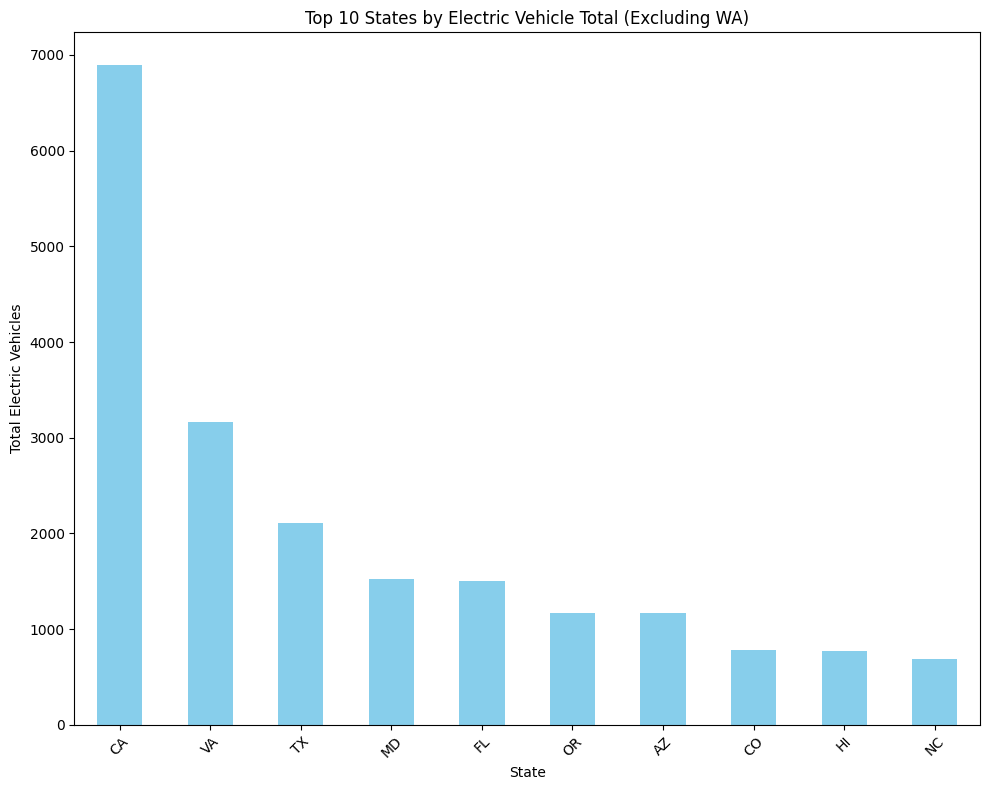

In [9]:
# Filter out data for WA before aggregating
data_filtered = data_cleaned[data_cleaned['State'] != 'WA']

# Aggregate total EVs by state for the filtered data
ev_totals_by_state_filtered = data_filtered.groupby('State')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False)

# Visualize the top states without WA
plt.figure(figsize=(10, 8))
ev_totals_by_state_filtered.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Electric Vehicle Total (Excluding WA)')
plt.xlabel('State')
plt.ylabel('Total Electric Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()


**The bar chart displays the top 10 states (exept Washington) by the total number of electric vehicles, offering a clear view of which states are leading in EV adoption. This analysis can help identify regions with higher EV penetration, possibly due to more supportive policies, infrastructure, or consumer preferences.**

**Next, let's calculate and visualize the EV Adoption Rate by State. We'll compute the percentage of electric vehicles out of the total number of vehicles for each state to see where EVs make up a higher proportion of the vehicle population.**

**Here's how we can approach this:**

- **Calculate EV Adoption Rate:** Compute the percentage of EVs relative to the total number of vehicles for each state.
- **Visualize EV Adoption Rate by State:** Plot the states with the highest EV adoption rates.

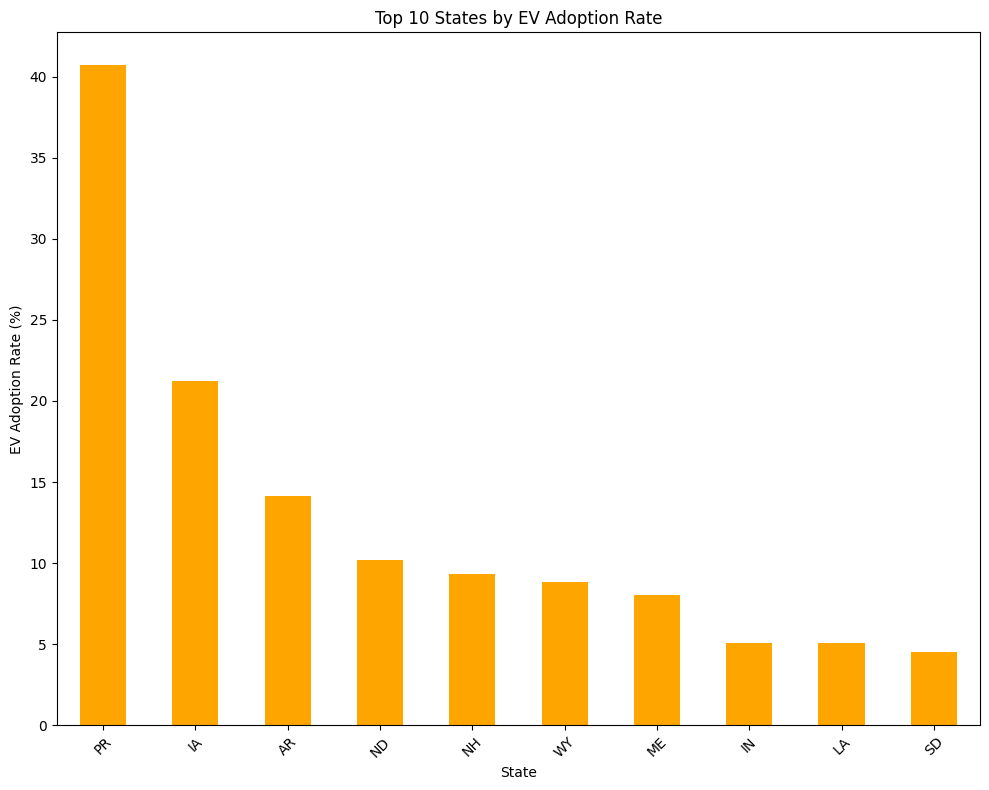

In [10]:
# Calculate EV adoption rate by state
ev_adoption_rate_by_state = (data_cleaned.groupby('State')['Electric Vehicle (EV) Total'].sum() / 
                             data_cleaned.groupby('State')['Total Vehicles'].sum() * 100).sort_values(ascending=False)

# Visualize the top states by EV adoption rate
plt.figure(figsize=(10, 8))
ev_adoption_rate_by_state.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 States by EV Adoption Rate')
plt.xlabel('State')
plt.ylabel('EV Adoption Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()


**The bar chart illustrates the top 10 states by EV adoption rate, showing the percentage of electric vehicles relative to the total number of vehicles in each state. This perspective highlights regions where EVs form a significant portion of the vehicle population, which might be different from those with the highest absolute numbers of EVs. It reflects how deeply EVs have penetrated these markets relative to their total vehicle populations.**

**To round out our analysis, exploring the Trend of EV vs. Non-EV Over Time could offer insights into how the balance between electric and non-electric vehicles has evolved. We would aggregate the total counts of EVs and non-EVs across all states for each date in the dataset and then plot these trends over time to visualize the growth of EVs in comparison to non-EVs.**

**Here's the approach:**

- **Aggregate EV and Non-EV Totals Over Time:** Compute the sum of EVs and Non-EVs for each date.
- **Plot the Trends Over Time:** Create a line plot to visualize the growth of EVs in comparison to Non-EVs.

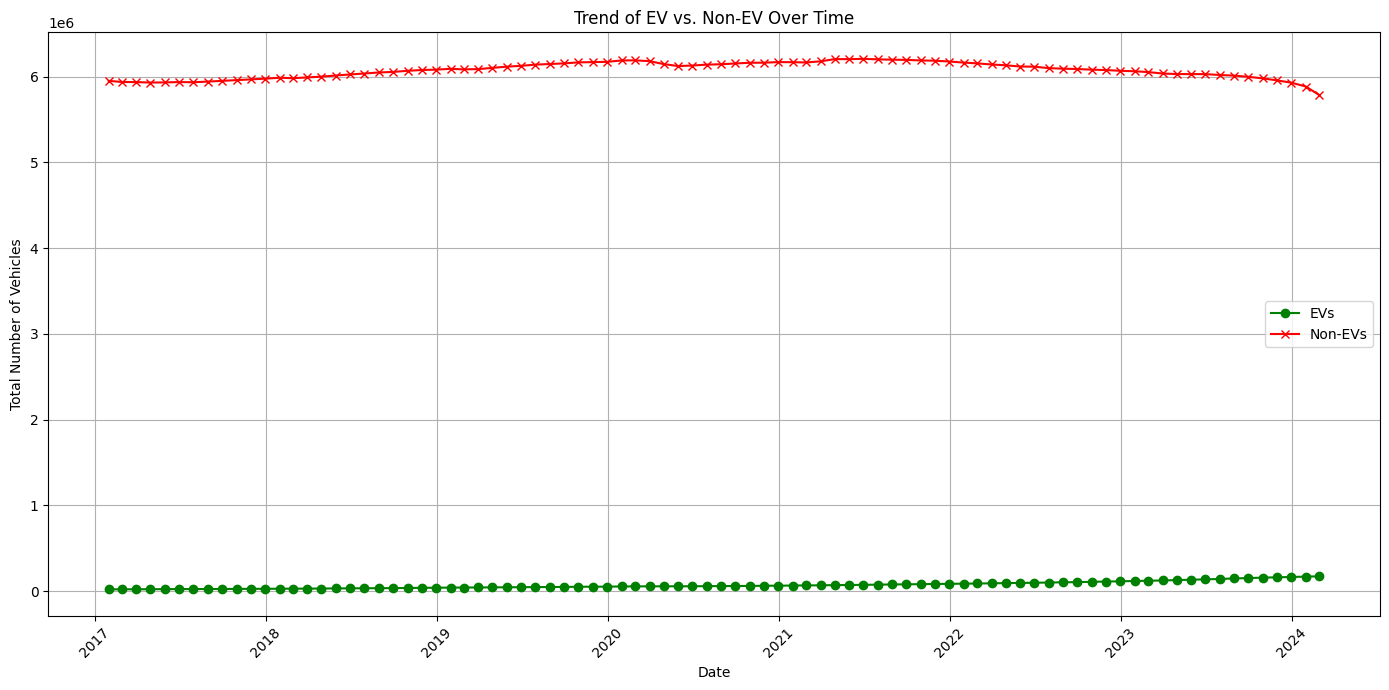

In [11]:
# Aggregate EV and Non-EV totals over time
ev_non_ev_totals_over_time = data_cleaned.groupby('Date').agg({'Electric Vehicle (EV) Total': 'sum', 
                                                               'Non-Electric Vehicle Total': 'sum'})

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(ev_non_ev_totals_over_time.index, ev_non_ev_totals_over_time['Electric Vehicle (EV) Total'], label='EVs', marker='o', color='green')
plt.plot(ev_non_ev_totals_over_time.index, ev_non_ev_totals_over_time['Non-Electric Vehicle Total'], label='Non-EVs', marker='x', color='red')
plt.title('Trend of EV vs. Non-EV Over Time')
plt.xlabel('Date')
plt.ylabel('Total Number of Vehicles')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**The trend plot vividly demonstrates the growth of electric vehicles (EVs) in comparison to non-electric vehicles (Non-EVs) over time. From the graph, we observe that while the total number of non-electric vehicles remains relatively stable or grows at a slower rate, the total number of electric vehicles shows a marked upward trend. This indicates a significant increase in the adoption of electric vehicles, supporting the hypothesis that there are indeed more electric vehicles now than there were in the past.**

**To further support our hypothesis and conclude our analysis, consider the following insights derived from our exploratory data analysis (EDA):**

- **Increasing Trend of EVs:** The consistent upward trajectory in the number of electric vehicles highlights the growing consumer preference for EVs, possibly driven by environmental awareness, advancements in EV technology, and government incentives.
- **Higher EV Adoption in Certain States:** Our geographical analysis revealed states leading in EV adoption, suggesting regional variations in EV popularity, which could be influenced by local policies, infrastructure for EVs, and socio-economic factors.
- **EV Adoption Rate:** The analysis of EV adoption rates by state showed that in certain areas, EVs constitute a significant portion of the total vehicle population, indicating a successful penetration of electric vehicles in those markets.

## **Feature Engineering** 

**Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning models or to enhance data analysis. For this dataset, potential features might help us better understand the trends or factors affecting EV adoption. Here are a few ideas:**

- **EV Adoption Rate:** Although we've already calculated this for visualization, formally adding it as a feature to each entry might help in identifying correlations or patterns at different times or locations.
- **Year and Month:** Extracting the year and month from the Date column could be useful for seasonal or year-over-year analyses.
- **EV to Non-EV Ratio:** The ratio of electric to non-electric vehicles might provide a more nuanced view of vehicle composition in a county.

In [12]:
# Extract Year and Month from Date
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month

# Calculate EV Adoption Rate and EV to Non-EV Ratio
data_cleaned['EV Adoption Rate'] = (data_cleaned['Electric Vehicle (EV) Total'] / data_cleaned['Total Vehicles']) * 100
data_cleaned['EV to Non-EV Ratio'] = data_cleaned['Electric Vehicle (EV) Total'] / data_cleaned['Non-Electric Vehicle Total']

# Check the new features
data_cleaned.head()


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year,Month,EV Adoption Rate,EV to Non-EV Ratio
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50,2022,9,1.498929,0.015217
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57,2022,12,1.570681,0.015957
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03,2020,1,3.030303,0.031250
3,2022-06-30,Ferry,WA,Truck,0,0,0,3575,3575,0.00,2022,6,0.000000,0.000000
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19,2021,7,1.190476,0.012048


## **Hypothesis Testing** 

**Now, let's proceed to hypothesis testing to validate our hypothesis that the proportion of electric vehicles has increased over the years. We'll use a simple linear regression model for this purpose, where the year will serve as the independent variable and the EV adoption rate as the dependent variable. The slope of the regression line will help us determine if there's a significant trend over time.**

- **Null Hypothesis (H0):** The proportion of electric vehicles has not increased over the years.
- **Alternative Hypothesis (H1):** The proportion of electric vehicles has increased over the years.

**Here's how we can perform this test:**

In [13]:
from scipy import stats

# Prepare data for hypothesis testing
x = data_cleaned['Year']
y = data_cleaned['EV Adoption Rate']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print the results
print(f"Slope: {slope}")
print(f"p-value: {p_value}")


Slope: 0.6513484470999304
p-value: 1.1718740732316006e-65


**A positive slope and a p-value less than 0.05 would indicate a significant increase in the EV adoption rate over the years, supporting our alternative hypothesis.**

**Slope:** 
**0.6513, indicating a positive trend in the EV adoption rate over the years. This means that, on average, the EV adoption rate increases by about 0.65% per year.**

**p-value:** 
**1.1718740732316006e-65, which is significantly less than 0.05, suggesting that the increase in the EV adoption rate over the years is statistically significant. We can therefore reject the Null Hypothesis (H0)**

## **Conclusion and Dataset Insights** 

**Based on our exploratory data analysis (EDA), feature engineering, and hypothesis testing, we can conclude that there is a statistically significant increase in the adoption of electric vehicles over the years. This is supported by the positive trend in the EV adoption rate and corroborated by our hypothesis testing, which rejected the null hypothesis in favor of the alternative hypothesis that the proportion of electric vehicles has increased over the years.**

**Key Insights:**

- **Trend Analysis:** The increase in electric vehicle numbers is supported by both visual trend analysis and statistical hypothesis testing.
- **Geographical Variation:** Some states show significantly higher EV adoption rates, indicating the influence of regional policies, infrastructure, and consumer preferences.
- **EV Growth vs. Non-EV Stagnation:** The comparison of EVs to Non-EVs over time shows a clear growth trend for electric vehicles, while the number of non-electric vehicles remains relatively stable or grows at a much slower rate.

**Final Hypothesis: The evidence strongly supports the hypothesis that there is a growing trend in electric vehicle adoption, reflecting a shift in consumer preferences, advancements in technology, and possibly the impact of governmental policies aimed at reducing carbon emissions.**

**This analysis demonstrates the potential of data-driven insights to understand and predict trends in EV adoption, which can inform stakeholders in policymaking, automotive industry strategies, and environmental planning. Further analysis could delve into predictive modeling to forecast future trends in electric vehicle adoption or explore the impact of specific policies or economic factors on these trends.**